<a href="https://colab.research.google.com/github/Mart1n610/CardioAlert/blob/main/CardioAlert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt #Librerias

In [2]:
señalPrueba = [1, 2, 3, 4, 5, 4, 3, 2, 1] #Señal para testeo, no es la final
ventanaHamming = np.hamming(len(señalPrueba))
señalVentana = señalPrueba * ventanaHamming #Aplicación de la ventana de Hamming a la señal para eliminar el ruido o el efecto de fugas

In [3]:
fourierft = np.fft.fft(señalVentana) #Aplicación de la fft a la señal
frecuenciaseñalp = 100 #Frecuencia de prueba de 100 Hz
frecuenciaCardio = np.argmax(np.abs(fourierft)) * (frecuenciaseñalp / len(señalPrueba)) #Obtenemos primero el valor absoluto de los números complejos obtenidos por la fft,
#y luego buscamos el índice más alto de la matriz obtenida. Y luego se divide por la frecuencia (de prueba), para obtener las pulsaciones cardiacas.
print(frecuenciaCardio)

0.0


In [4]:
def detectarPicos(señalPrueba):
    picos = [] #Lista para almacenar los picos
    for i in range(1, len(señalPrueba) - 1):
        if señalPrueba[i] > señalPrueba[i - 1] and señalPrueba[i] > señalPrueba[i + 1]: #Verifica la existencia de picos recorriendo toda la señal.
            picos.append(i)
        #ifs para manejar los bordes de la señal
        if señalPrueba[0] > señalPrueba[1]: #Si esto es cierto, significa que el primer valor es un pico.
            picos.insert(0, 0)
        if señalPrueba[-1] > señalPrueba[-2]: #Si esto es cierto, significa que el último valor es un pico.
            picos.append(len(señalPrueba) - 1)
    return picos

In [5]:
picosDetectados = detectarPicos(señalVentana)

In [7]:
def detectarPicosReposo(señalPrueba, umbral):
  picosReposo = []
  for i in range(len(señalPrueba)):
    if(señalPrueba[i]<=umbral):
      picosReposo.append(i)
  return picosReposo

In [18]:
umbralReposo = 0.25
picosDetectadosRep = detectarPicosReposo(señalVentana, umbralReposo)

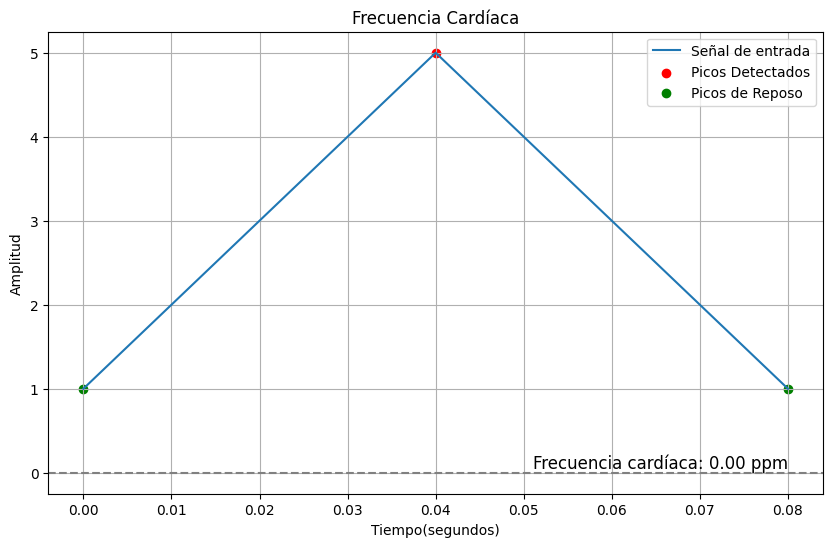

In [19]:
tiempo = np.arange(len(señalPrueba)) / frecuenciaseñalp #Calcula un arreglo de valores que representan el tiempo en segundos correspondiente a cada muestra de la señal de entrada
#Gráfico de la señal
plt.figure(figsize=(10,6))
plt.plot(tiempo, señalPrueba, label = 'Señal de entrada')
plt.xlabel("Tiempo(segundos)")
plt.ylabel("Amplitud")
plt.title("Frecuencia Cardíaca")
plt.legend()
#Graficó de los picos
picosT = np.array(picosDetectados) / frecuenciaseñalp
picosS = [señalPrueba[i] for i in picosDetectados]
picosRT = np.array(picosDetectadosRep) / frecuenciaseñalp
picosRS = [señalPrueba[i] for i in picosDetectadosRep]
plt.scatter(picosT, picosS, color ="red", label="Picos Detectados")
plt.scatter(picosRT, picosRS, color ="green", label="Picos de Reposo")
plt.axhline(y=0, color='gray', linestyle='--')
plt.text(tiempo[-1], 0, f'Frecuencia cardíaca: {frecuenciaCardio:.2f} ppm', va='bottom', ha='right', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv ("cora.csv")
df

,Age,Sex,ChestPainType,RestingBP,RestingECG,MaxHR,ExerciseAngina,HeartDisease
0,40,M,ATA,140,Normal,172,N,0
1,49,F,NAP,160,Normal,156,N,1
2,37,M,ATA,130,ST,98,N,0
3,48,F,ASY,138,Normal,108,Y,1
4,54,M,NAP,150,Normal,122,N,0
...,...,...,...,...,...,...,...,...
913,45,M,TA,110,Normal,132,N,1
914,68,M,ASY,144,Normal,141,N,1
915,57,M,ASY,130,Normal,115,Y,1
916,57,F,ATA,130,LVH,174,N,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

NameError: ignored